In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("DATE.csv")

data_visualize

,x1,DoY,(delta)PD
0,0.2083,237.2083,-0.1
1,0.4583,237.4583,-0.1
2,0.6250,237.6250,-0.1
3,0.6667,237.6667,-0.1
4,0.7083,237.7083,-0.1
...,...,...,...
407,40.8750,277.8750,-0.1
408,41.0000,278.0000,-0.1
409,41.0833,278.0833,-0.1
410,41.2083,278.2083,-0.1


In [3]:
data = np.loadtxt("DATE_np.csv", delimiter = ',', dtype = np.float32)

X_COL = len(data_visualize.columns) - 1

x = data[:, :X_COL]
y = data[:, [-1]].ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [4]:
#### LINEAR MODEL ####

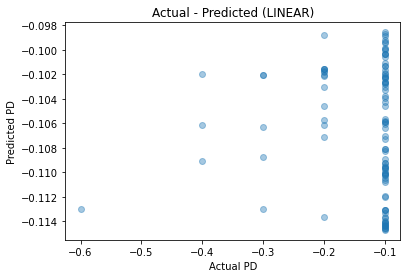

In [24]:
SupportVectorRegModel_linear = SVR(kernel = 'linear', C = 0.1, gamma = 'auto', epsilon = .001)
SupportVectorRegModel_linear.fit(x_train, y_train)

y_hat_linear = SupportVectorRegModel_linear.predict(x_test)

plt.scatter(y_test, y_hat_linear, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (LINEAR)')
plt.show()

In [25]:
mse = mean_squared_error(y_test, y_hat_linear)
rmse = np.sqrt(mse)
mean_absolute_error(y_test, y_hat_linear)

print("LINEAR RMSE:", rmse)
print("LINEAR MAE:", mean_absolute_error(y_test, y_hat_linear))

LINEAR RMSE: 0.0892598963127191
LINEAR MAE: 0.04130169218516735


In [7]:
#### RBF MODEL ####

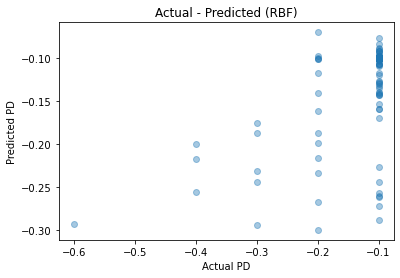

In [30]:
SupportVectorRegModel_rbf = SVR(kernel = 'rbf', C = 100, gamma = 'auto', epsilon = .001)
SupportVectorRegModel_rbf.fit(x_train, y_train)

y_hat_rbf = SupportVectorRegModel_rbf.predict(x_test)

plt.scatter(y_test, y_hat_rbf, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (RBF)')
plt.show()

In [31]:
mse = mean_squared_error(y_test, y_hat_rbf)
rmse = np.sqrt(mse)
mean_absolute_error(y_test, y_hat_rbf)

print("RBF RMSE:", rmse)
print("RBF MAE:", mean_absolute_error(y_test, y_hat_rbf))

RBF RMSE: 0.07095774970660375
RBF MAE: 0.039752905043218045
